In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
dataset_train

Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                  3423509          7999.55  
...                    ...              ...  
2030                586100           694.98  
2031                658440           780.01  
2032                281312           340.31  
2033                293312           355.17  
2034                658666           803.56  

[2035 rows x 8 columns]

In [ ]:
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
62/62 [==============================] - 18s 148ms/step - loss: 0.0115
Epoch 2/100
62/62 [==============================] - 8s 126ms/step - loss: 0.0030
Epoch 3/100
62/62 [==============================] - 11s 171ms/step - loss: 0.0030
Epoch 4/100
62/62 [==============================] - 10s 159ms/step - loss: 0.0026
Epoch 5/100
62/62 [==============================] - 8s 126ms/step - loss: 0.0023
Epoch 6/100
62/62 [==============================] - 9s 147ms/step - loss: 0.0024
Epoch 7/100
62/62 [==============================] - 9s 146ms/step - loss: 0.0026
Epoch 8/100
62/62 [==============================] - 8s 124ms/step - loss: 0.0020
Epoch 9/100
62/62 [==============================] - 9s 147ms/step - loss: 0.0018
Epoch 10/100
62/62 [==============================] - 9s 145ms/step - loss: 0.0018
Epoch 11/100
62/62 [==============================] - 8s 124ms/step - loss: 0.0019
Epoch 12/100
62/62 [==============================] - 9s 147ms/step - loss: 0.0020
Epoch 13/1

### Prediction of Test Set

In [ ]:
#importing the test set

url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_test

Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0   2018-10-24  220.10  221.25  217.05  219.55  219.80               2171956   
1   2018-10-23  221.10  222.20  214.75  219.55  218.30               1416279   
2   2018-10-22  229.45  231.60  222.00  223.05  223.25               3529711   
3   2018-10-19  230.30  232.70  225.50  227.75  227.20               1527904   
4   2018-10-17  237.70  240.80  229.45  231.30  231.10               2945914   
5   2018-10-16  237.10  237.70  233.05  234.40  235.45               1723113   
6   2018-10-15  229.70  237.00  226.80  234.80  234.90               1224339   
7   2018-10-12  226.25  232.35  225.50  228.70  229.10               1165527   
8   2018-10-11  215.00  229.70  215.00  225.60  224.60               1293881   
9   2018-10-10  215.00  229.65  215.00  228.25  228.40               2919278   
10  2018-10-09  215.50  219.15  209.60  215.00  216.50               1844462   
11  2018-10-08  208.00  222.25  206.85  216.00  215.15               4642146   
12  2018-10-05  217.00  218.60  205.90  210.25  209.20               3519515   
13  2018-10-04  223.50  227.80  216.15  217.25  218.20               1728786   
14  2018-10-03  230.00  237.50  225.75  226.45  227.60               1708590   
15  2018-10-01  234.55  234.60  221.05  230.30  230.90               1534749   

    Turnover (Lacs)  
0           4771.34  
1           3092.15  
2           8028.37  
3           3490.78  
4           6961.65  
5           4052.25  
6           2845.68  
7           2675.91  
8           2890.85  
9           6557.95  
10          3940.70  
11         10062.83  
12          7407.06  
13          3815.79  
14          3960.27  
15          3486.05

In [ ]:
real_stock_price

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

Before predicting future stock prices, we have to modify the test set (notice similarities to the edits we made to the training set): merge the training set and the test set on the 0 axis, set 60 as the time step again, use MinMaxScaler, and reshape data. Then, inverse_transform puts the stock prices in a normal readable format.

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


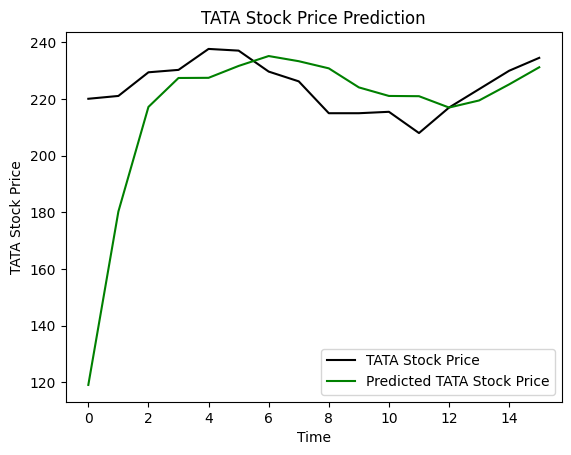

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

In [ ]:
real_stock_price = np.reshape(real_stock_price, (real_stock_price.shape[0], real_stock_price.shape[1], 1))


In [ ]:
from sklearn.metrics import mean_absolute_error


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Generate forecasts for the test set
forecast = model.predict(real_stock_price)

# Reshape the arrays to 1D
real_stock_price = np.reshape(real_stock_price, (-1,))
forecast = np.reshape(forecast, (-1,))

# Calculate the accuracy metrics
mse = mean_squared_error(real_stock_price, forecast)
mae = mean_absolute_error(real_stock_price, forecast)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(real_stock_price, forecast)

# Print the accuracy metrics
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("Root Mean Squared Error (RMSE): ", rmse)
print("Mean Absolute Percentage Error (MAPE): ", mape)


1/1 [==============================] - 2s 2s/step
Mean Squared Error (MSE):  50017.285455719495
Mean Absolute Error (MAE):  223.48131035640836
Root Mean Squared Error (RMSE):  223.64544586402715
Mean Absolute Percentage Error (MAPE):  99.59416743476395
